# Different Imputation Methods

This notebook demonstrates how to use different imputation methods with MICE.

## Overview

MICE supports several imputation methods:
- **PMM** (Predictive Mean Matching): Good for continuous variables
- **CART** (Classification and Regression Trees): Works for both continuous and categorical
- **RF** (Random Forest): Works for both continuous and categorical  
- **SAMPLE**: Random sampling from observed values (fast, default)

In this notebook, we will:
1. Use the same method for all columns
2. Use different methods for different columns
3. Compare results visually
4. Discuss when to use which method


## 1. Import Libraries and Load Data


In [40]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

from imputation.MICE import MICE
from plotting.diagnostics import stripplot, densityplot, plot_chain_stats

# Load NHANES dataset
df = pd.read_csv('data/nhanes.csv')
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:")
print(df.isnull().sum())


Dataset shape: (25, 4)

Columns: ['age', 'bmi', 'hyp', 'chl']

Missing values:
age     0
bmi     9
hyp     8
chl    10
dtype: int64


## 2. Using the Same Method for All Columns

You can specify a single imputation method that will be applied to all variables with missing values.


### 2.1 Using PMM (Predictive Mean Matching)

PMM is a popular method that preserves the distribution of the data.


In [41]:
# Initialize MICE and impute using PMM for all columns
mice_pmm = MICE(df)
mice_pmm.impute(n_imputations=5, maxit=10, method='pmm')

print(f"Imputation with PMM complete!")
print(f"Generated {len(mice_pmm.imputed_datasets)} datasets")


Imputation with PMM complete!
Generated 5 datasets


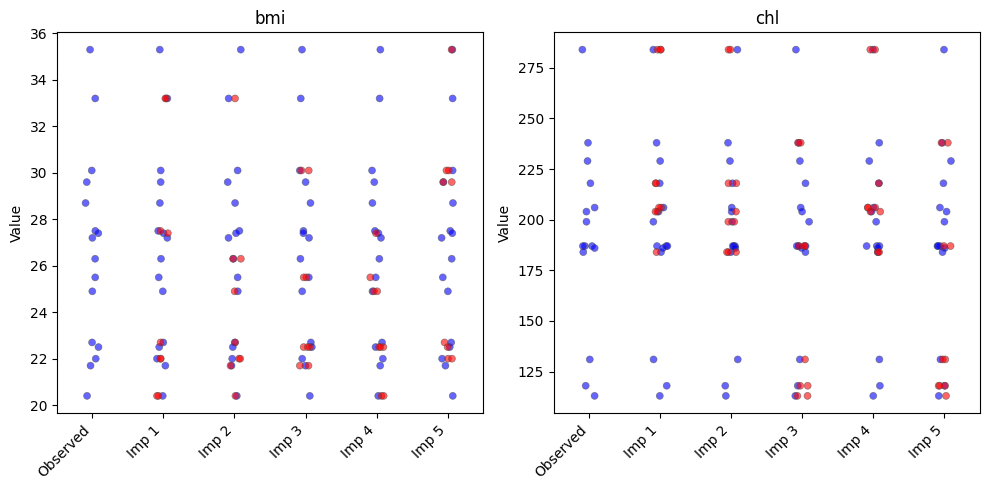

In [42]:
# Visualize imputed values with stripplot
missing_pattern = df.notna().astype(int)
stripplot(mice_pmm.imputed_datasets, missing_pattern, columns=['bmi', 'chl'])


### 2.2 Using CART (Classification and Regression Trees)


In [43]:
# Initialize MICE and impute using CART for all columns
mice_cart = MICE(df)
mice_cart.impute(n_imputations=5, maxit=10, method='cart')

print(f"Imputation with CART complete!")
print(f"Generated {len(mice_cart.imputed_datasets)} datasets")


Imputation with CART complete!
Generated 5 datasets


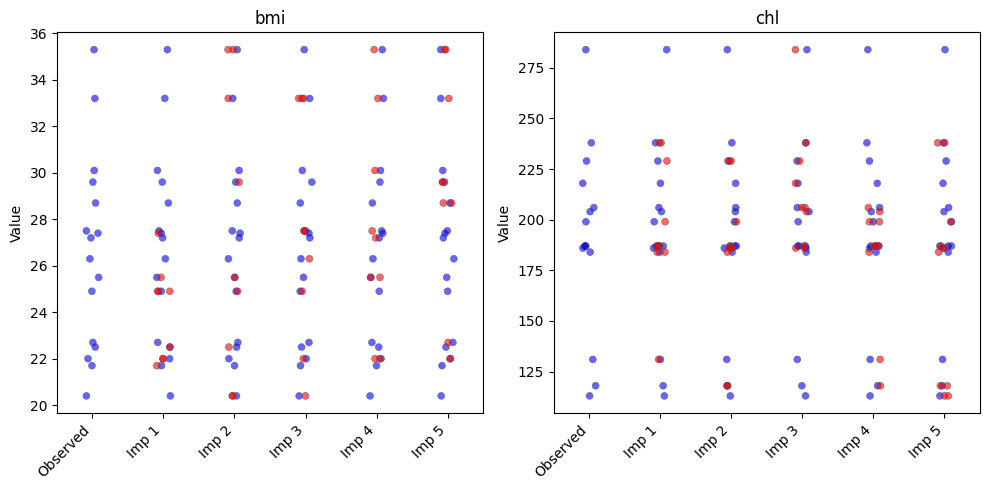

In [44]:
# Visualize imputed values with stripplot
stripplot(mice_cart.imputed_datasets, missing_pattern, columns=['bmi', 'chl'])


### 2.3 Using Random Forest (RF)


In [45]:
# Initialize MICE and impute using RF for all columns
mice_rf = MICE(df)
mice_rf.impute(n_imputations=5, maxit=10, method='rf')

print(f"Imputation with RF complete!")
print(f"Generated {len(mice_rf.imputed_datasets)} datasets")


Imputation with RF complete!
Generated 5 datasets


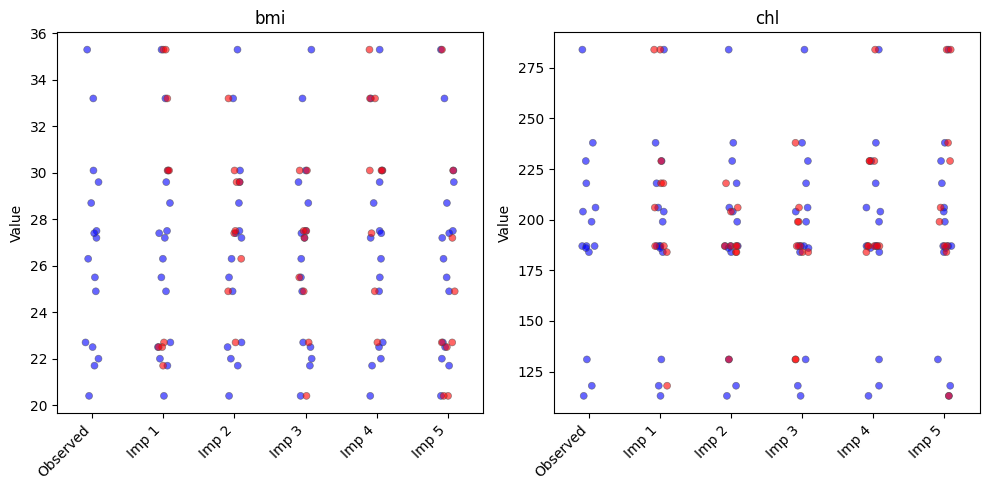

In [46]:
# Visualize imputed values with stripplot
stripplot(mice_rf.imputed_datasets, missing_pattern, columns=['bmi', 'chl'])


## 3. Using Different Methods for Different Columns

You can specify different imputation methods for each column using a dictionary.


In [47]:
# Specify different methods for different columns
# - Use PMM for continuous 'bmi'
# - Use CART for 'hyp' (can handle categorical/binary)
# - Use RF for 'chl'
# - 'age' has no missing values, so method doesn't matter

method_dict = {
    'age': 'sample',  # No missing values
    'bmi': 'pmm',     # Continuous variable - PMM works well
    'hyp': 'cart',    # Binary/categorical - CART is appropriate
    'chl': 'rf'       # Continuous - RF can capture complex relationships
}

mice_mixed = MICE(df)
mice_mixed.impute(n_imputations=5, maxit=10, method=method_dict)

print("Imputation with mixed methods complete!")
print(f"Methods used: {mice_mixed.method}")


Imputation with mixed methods complete!
Methods used: {'age': 'sample', 'bmi': 'pmm', 'hyp': 'cart', 'chl': 'rf'}


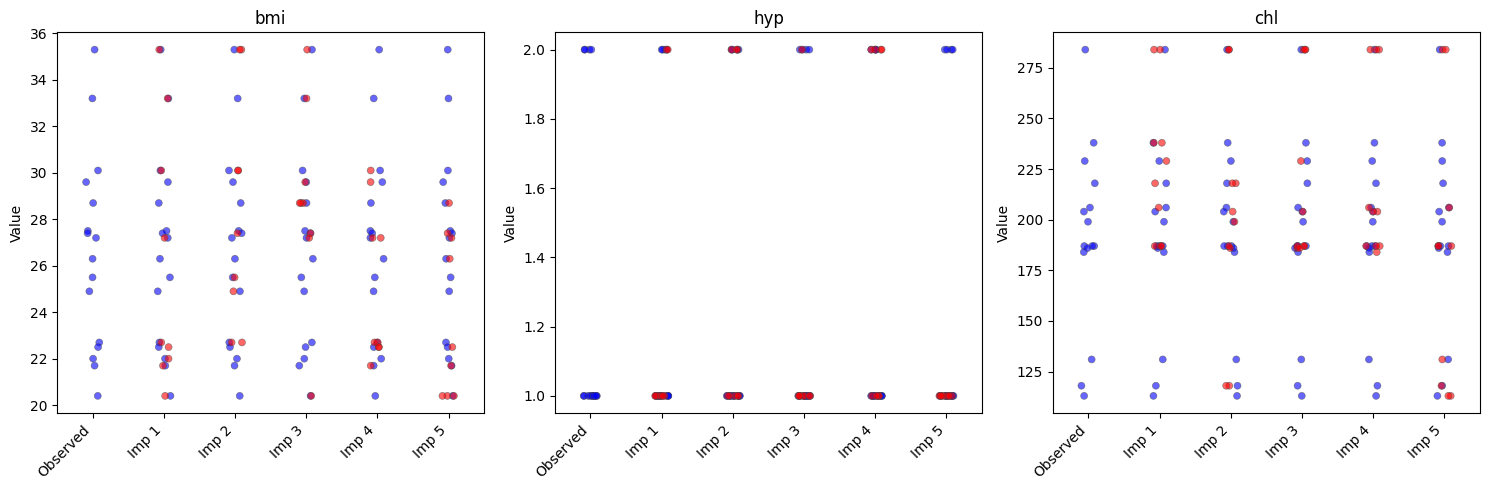

In [48]:
# Visualize results
stripplot(mice_mixed.imputed_datasets, missing_pattern)


## 4. Comparing Methods with Density Plots

Let's compare the distributions of imputed values across different methods.


Comparing BMI distributions across methods:


PMM method:


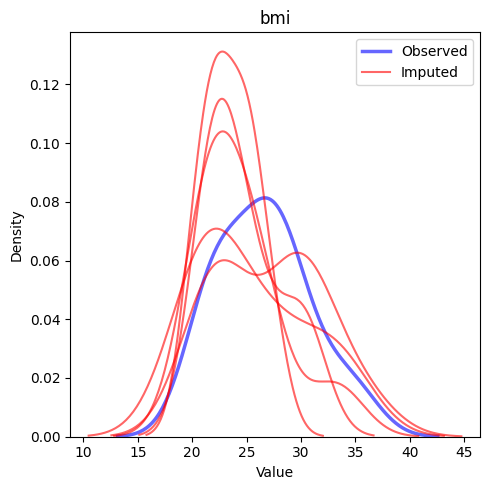


CART method:


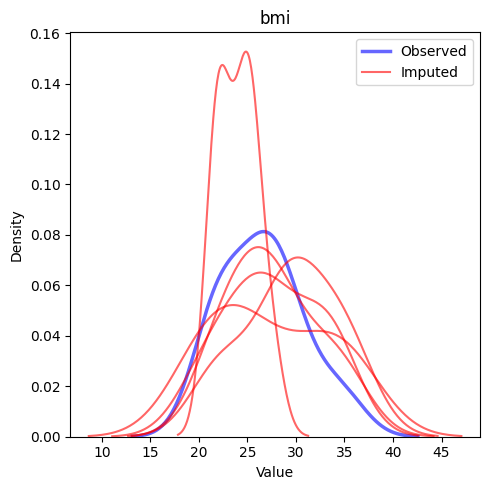


Random Forest method:


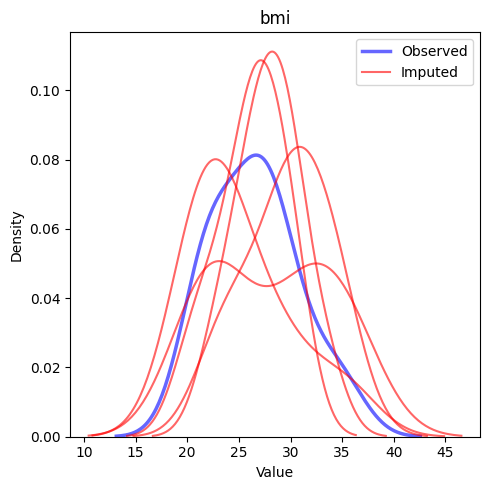

In [49]:
# Compare BMI imputations from different methods
import matplotlib.pyplot as plt

# Compare BMI imputations from different methods
print("Comparing BMI distributions across methods:\n")

methods = [
    (mice_pmm, 'PMM'),
    (mice_cart, 'CART'),
    (mice_rf, 'Random Forest')
]

for mice_obj, method_name in methods:
    print(f"\n{method_name} method:")
    densityplot(mice_obj.imputed_datasets, missing_pattern, columns=['bmi'])


## 5. Checking Convergence Across Methods

Let's examine convergence for each method.


Convergence for PMM method:


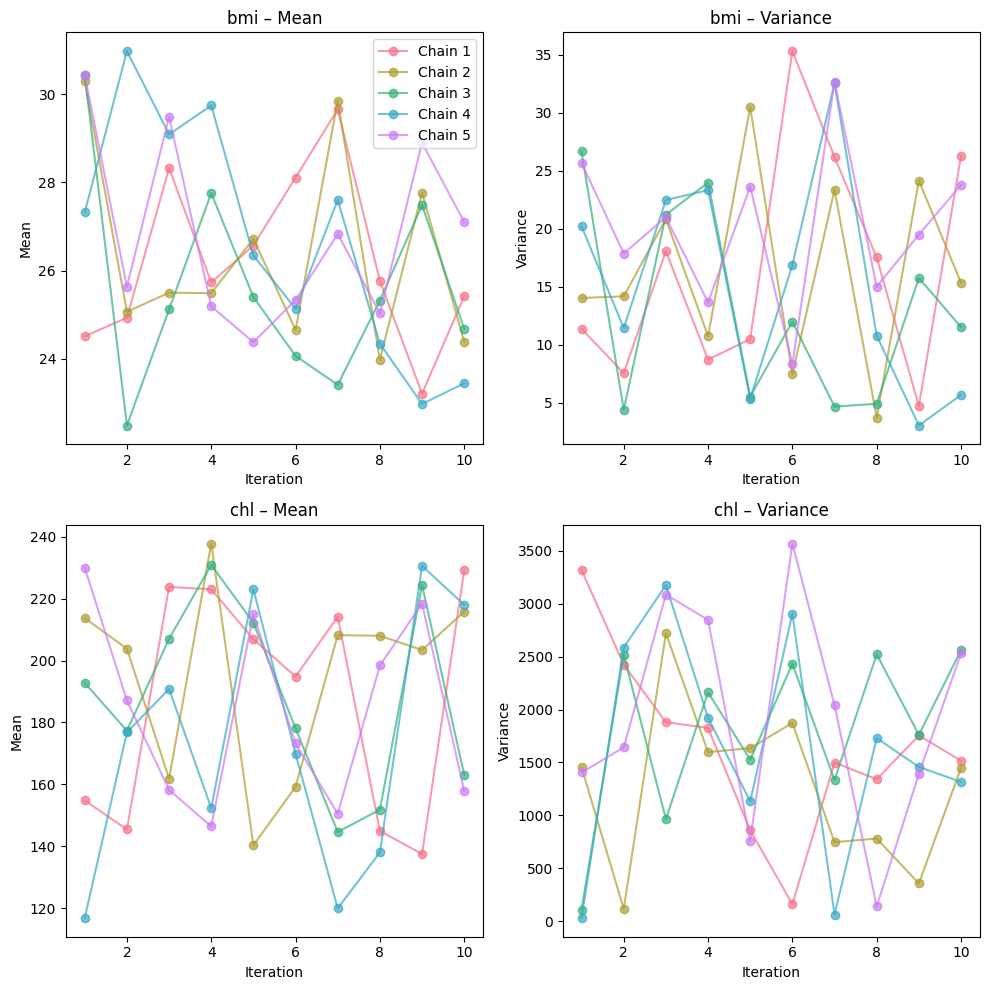

In [50]:
# Check convergence for PMM
print("Convergence for PMM method:")
numeric_cols = ['bmi', 'chl']
plot_chain_stats(mice_pmm.chain_mean, mice_pmm.chain_var, columns=numeric_cols)


Convergence for mixed methods:


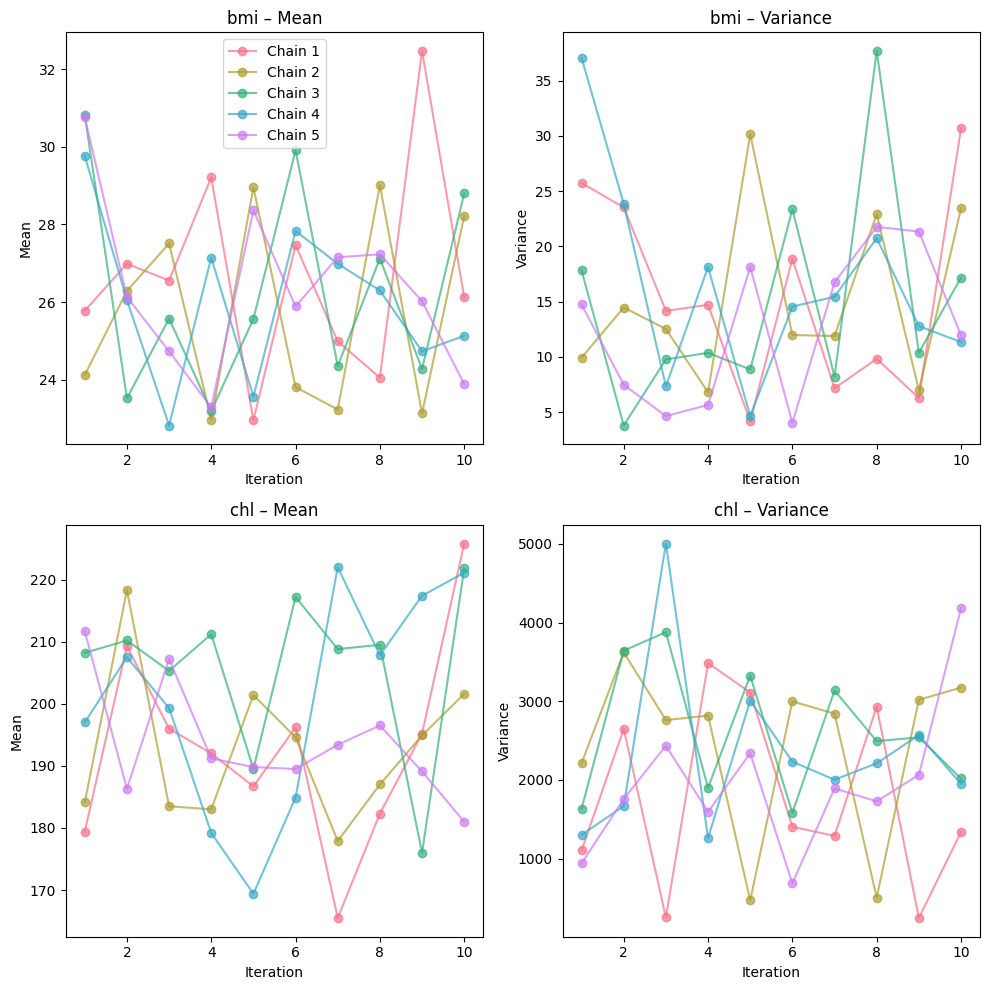

In [51]:
# Check convergence for mixed methods
print("Convergence for mixed methods:")
plot_chain_stats(mice_mixed.chain_mean, mice_mixed.chain_var, columns=numeric_cols)


## 6. When to Use Which Method

### Method Selection Guidelines:

**PMM (Predictive Mean Matching)**
- Best for: Continuous variables
- Advantages: Preserves distribution, doesn't generate impossible values
- Use when: You want to ensure imputed values are realistic (from observed data)

**CART (Classification and Regression Trees)**
- Best for: Both continuous and categorical variables
- Advantages: Handles non-linear relationships, no distributional assumptions
- Use when: Data has complex interactions or categorical variables

**Random Forest (RF)**
- Best for: Both continuous and categorical, especially with many predictors
- Advantages: Captures complex non-linear relationships, robust to overfitting
- Use when: You have many predictors and complex relationships

**SAMPLE (Random Sampling)**
- Best for: Quick imputations, no strong relationships
- Advantages: Fast, simple
- Use when: Exploratory analysis or as initial imputation


## Summary

In this notebook, we learned:
- How to use the same imputation method for all columns (string parameter)
- How to use different methods for different columns (dictionary parameter)
- Available methods: PMM, CART, RF, SAMPLE
- How to compare results visually across methods
- Guidelines for selecting appropriate methods

**Next steps**:
- See `03_advanced_parameters.ipynb` to learn about method-specific parameters
- See `04_analysis_workflow.ipynb` for complete statistical inference workflow
- See `05_diagnostic_plots.ipynb` for comprehensive plotting options
